# Initialization

In [0]:
from google.colab import files
import io

In [178]:
uploaded = files.upload()

Saving Hotels.csv to Hotels (1).csv
Saving users_data.csv to users_data (1).csv


In [0]:
import pandas as pd
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import re
import numpy as np
from numpy import ndarray

In [0]:
hotels0 = pd.read_csv('Hotels.csv', index_col=0)
reviews = pd.read_csv('users_data.csv', index_col=0)

# Cleaning Data 

In [0]:
#Removing duplicate rows !
hotels0 = "Hotels.csv"
hotels = "Hotels_profile.csv"
hotels0 = pd.read_csv(hotels0, index_col=0)
hotels0.drop_duplicates(subset=None, inplace=True)
hotels0.to_csv(hotels)

In [204]:
hotels0 = pd.read_csv('Hotels.csv', index_col=0)
hotels = pd.read_csv('Hotels_profile.csv', index_col=0)
print(len(hotels))
print(len(hotels0))

290
295


In [261]:
#drop rows with missing values ....
hotels.dropna(how="any")
hotels.describe()


,hotel_class,price,hotel_score_reviews,totalReview,location_score,cleanliness_score,service_score,value_score,Parking,Free_High_Speed_Internet_(WiFi),Pool,Fitness_Center_with_Gym_Workout_Room,Bar_lounge,Business_Center_with_Internet_Access,Conference_facilities,Spa,,Valet_parking,Wifi,Car_hire,Free_internet,Foot_massage,Banquet_room,Baggage_storage,Concierge,24-hour_front_desk,Highchairs_available,Airport_transportation,Paid_private_parking_on-site,Breakfast_available,Bicycle_rental,Pets_Allowed_(_Dog_Pet_Friendly_),Taxi_service,Fax_photocopying,Rooftop_terrace,Free_parking,Free_breakfast,Beach,Tennis_court,Babysitting,...,Outdoor_pool,Convenience_store,Darts,Self-serve_laundry,Tennis_court_offsite,Photo_copier_fax_In_business_center,Business,Centrally_Located,Green,Classic,Charming,Family,Mid-range,Bay_View,Great_View,Trendy,Quiet,Quirky_Hotels,Quaint,Mountain_View,Ocean_View,Hidden_Gem,Luxury,nan,Romantic,Residential_Neighborhood,Lake_View,Park_View,Modern,Historic_Hotel,River_View,Lagoon_View,Art_Deco_Style,Boutique,Family_Resort,Harbor_View,City_View,Budget,Marina_View,Value
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,289.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,...,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,3.546552,2180.758621,4.086207,1736.162069,4.372414,4.348276,4.258621,4.017301,0.131034,0.800000,0.537931,0.610345,0.503448,0.417241,0.327586,0.062069,0.0,0.075862,0.137931,0.089655,0.096552,0.003448,0.065517,0.258621,0.086207,0.106897,0.027586,0.134483,0.124138,0.013793,0.148276,0.268966,0.124138,0.172414,0.024138,0.462069,0.375862,0.058621,0.020690,0.082759,...,0.006897,0.006897,0.003448,0.006897,0.003448,0.003448,0.193103,0.175862,0.058621,0.037931,0.044828,0.182759,0.168966,0.031034,0.144828,0.017241,0.086207,0.013793,0.031034,0.013793,0.020690,0.020690,0.027586,0.127586,0.024138,0.013793,0.006897,0.031034,0.068966,0.041379,0.017241,0.003448,0.006897,0.003448,0.003448,0.010345,0.003448,0.034483,0.003448,0.003448
std,0.933093,1737.329274,0.541831,2148.198152,0.443247,0.498524,0.440601,0.414216,0.338021,0.400691,0.499421,0.488515,0.500852,0.493956,0.470144,0.241698,0.0,0.265235,0.345424,0.286181,0.295857,0.058722,0.247864,0.438634,0.281154,0.309516,0.164067,0.341760,0.330309,0.116833,0.355988,0.444189,0.330309,0.378393,0.153743,0.499421,0.485182,0.235319,0.142589,0.275993,...,0.082902,0.082902,0.058722,0.082902,0.058722,0.058722,0.395416,0.381361,0.235319,0.191360,0.207283,0.387137,0.375369,0.173711,0.352535,0.130395,0.281154,0.116833,0.173711,0.116833,0.142589,0.142589,0.164067,0.334205,0.153743,0.116833,0.082902,0.173711,0.253834,0.199510,0.130395,0.058722,0.082902,0.058722,0.058722,0.101357,0.058722,0.182781,0.058722,0.058722
min,1.000000,288.500000,2.500000,16.000000,2.500000,2.500000,2.500000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

# visualising Data



---




In [206]:
hotels.head()

,url,Country,Region,Street,Zip,location,property_amenties,room_features,hotel_style,hotel_class,price,hotel_score_reviews,totalReview,location_score,cleanliness_score,service_score,value_score
name,,,,,,,,,,,,,,,,,
"Radisson Blu Royal Viking Hotel, Stockholm",https://www.tripadvisor.in/Hotel_Review-g18985...,Sweden,Sweden Stockholm Norrmalm,1 Vasagatan P.O. Box 234,111 20,"1 Vasagatan P.O. Box 234, Stockholm 111 20 Sweden",Parking Free_High_Speed_Internet_(WiFi) Pool F...,Air_conditioning Housekeeping Room_service Saf...,Business Centrally_Located,4.0,1643.0,4.0,481,4.5,4.5,4.0,4.0
Hilton San Francisco Union Square,https://www.tripadvisor.in/Hotel_Review-g60713...,United States,United States California San Francisco Downtow...,333 O'Farrell Street,94102-2116,"333 O'Farrell Street, San Francisco, CA 94102-...",Valet_parking Wifi Pool Fitness_Center_with_Gy...,Air_conditioning Housekeeping Room_service Saf...,Green Centrally_Located,4.0,3183.0,3.5,4483,4.5,4.0,4.0,3.5
Sofitel London Gatwick Hotel,https://www.tripadvisor.in/Hotel_Review-g18705...,United Kingdom,United Kingdom England Crawley,North Terminal Gatwick Airport,RH6 0PH,"North Terminal Gatwick Airport, Crawley RH6 0P...",Valet_parking Free_internet Fitness_Center_wit...,Blackout_curtains Soundproof_rooms Air_conditi...,Business Centrally_Located,2.0,2297.0,4.5,10401,5.0,4.5,4.5,4.0
Holiday Inn London Sutton,https://www.tripadvisor.in/Hotel_Review-g50418...,United Kingdom,United Kingdom England Sutton,Gibson Road,SM1 2RF,"Gibson Road, Sutton SM1 2RF England",Parking Free_internet Pool Fitness_Center_with...,Air_conditioning Housekeeping Room_service Fla...,Centrally_Located,3.0,1361.5,4.0,646,4.0,4.0,4.0,3.5
Radisson Blu Edwardian Vanderbilt,https://www.tripadvisor.in/Hotel_Review-g18633...,United Kingdom,United Kingdom England London Kensington and H...,68-86 Cromwell Road Kensington and Chelsea,SW7 5BT,"68-86 Cromwell Road Kensington and Chelsea, Lo...",Free_High_Speed_Internet_(WiFi) Fitness_Center...,Air_conditioning Housekeeping Room_service Saf...,Classic,4.0,2382.0,4.0,4945,4.5,4.5,4.5,4.0


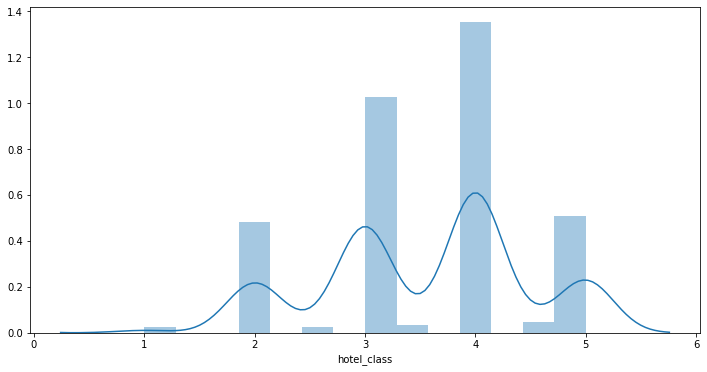

In [207]:
plt.figure(figsize=(12, 6))
sns.distplot(hotels['hotel_class'])

In [208]:
hotels.corr()["hotel_score_reviews"].sort_values()

totalReview            0.065837
price                  0.317739
hotel_class            0.505339
location_score         0.690696
value_score            0.777146
cleanliness_score      0.868436
service_score          0.881019
hotel_score_reviews    1.000000
Name: hotel_score_reviews, dtype: float64

In [209]:

hotels = pd.read_table('Hotels_profile.csv', sep=',')
users = pd.read_table('users_data.csv', sep=',')
hotels_names = hotels.name.unique()
users_reviews = users.hotel_name.unique()
for hotel in hotels.itertuples(index=True, name='Pandas'):
    print("hotel : ",getattr(hotel, "name"),"\n",users[getattr(users, "hotel_name") == getattr(hotel, "name")])

hotel :  Radisson Blu Royal Viking Hotel, Stockholm 
               username                                  hotel_name  score
0       Sarah Williams  Radisson Blu Royal Viking Hotel, Stockholm      4
1         Tomi Wickman  Radisson Blu Royal Viking Hotel, Stockholm      5
2             Howard M  Radisson Blu Royal Viking Hotel, Stockholm      5
3             Number34  Radisson Blu Royal Viking Hotel, Stockholm      5
4     pawelostrowski15  Radisson Blu Royal Viking Hotel, Stockholm      5
...                ...                                         ...    ...
1665    Sarah Williams  Radisson Blu Royal Viking Hotel, Stockholm      4
1666      Tomi Wickman  Radisson Blu Royal Viking Hotel, Stockholm      5
1667          Howard M  Radisson Blu Royal Viking Hotel, Stockholm      5
1668          Number34  Radisson Blu Royal Viking Hotel, Stockholm      5
1669  pawelostrowski15  Radisson Blu Royal Viking Hotel, Stockholm      5

[65 rows x 3 columns]
hotel :  Hilton San Francisco Union

In [210]:
hotels.describe()

,hotel_class,price,hotel_score_reviews,totalReview,location_score,cleanliness_score,service_score,value_score
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,289.000000
mean,3.546552,2180.758621,4.086207,1736.162069,4.372414,4.348276,4.258621,4.017301
std,0.933093,1737.329274,0.541831,2148.198152,0.443247,0.498524,0.440601,0.414216
min,1.000000,288.500000,2.500000,16.000000,2.500000,2.500000,2.500000,2.500000
25%,3.000000,1237.000000,4.000000,453.000000,4.000000,4.000000,4.000000,4.000000
50%,4.000000,1680.750000,4.000000,988.000000,4.500000,4.500000,4.500000,4.000000
75%,4.000000,2397.000000,4.500000,2054.250000,4.500000,4.500000,4.500000,4.500000
max,5.000000,13802.000000,5.000000,15046.000000,5.000000,5.000000,5.000000,5.000000


# preprocessing Data

###  property_amenties

In [0]:
hotels['property_amenties'] = hotels['property_amenties'].apply(lambda x: x.split(' '))


In [0]:
list_of_properties = hotels.property_amenties


In [213]:
#check which unique amenities exist in highlights column
list_of_unique_properties = []
for list in list_of_properties:
    for pr in list:
        if pr not in list_of_unique_properties:
            list_of_unique_properties.append(pr)
print (list_of_unique_properties)

['Parking', 'Free_High_Speed_Internet_(WiFi)', 'Pool', 'Fitness_Center_with_Gym_Workout_Room', 'Bar_lounge', 'Business_Center_with_Internet_Access', 'Conference_facilities', 'Spa', '', 'Valet_parking', 'Wifi', 'Car_hire', 'Free_internet', 'Foot_massage', 'Banquet_room', 'Baggage_storage', 'Concierge', '24-hour_front_desk', 'Highchairs_available', 'Airport_transportation', 'Paid_private_parking_on-site', 'Breakfast_available', 'Bicycle_rental', 'Pets_Allowed_(_Dog_Pet_Friendly_)', 'Taxi_service', 'Fax_photocopying', 'Rooftop_terrace', 'Free_parking', 'Free_breakfast', 'Beach', 'Tennis_court', 'Babysitting', 'Board_games_puzzles', 'Diving', 'Non-smoking_hotel', 'Laundry_service', 'Massage', 'Horseback_riding', 'Books,_DVDs,_music_for_children', 'Free_shuttle_or_taxi_services', 'Shuttle_bus_service', 'Dry_cleaning', 'Children_Activities_(Kid_Family_Friendly)', 'Fishing', 'Hiking', 'Gift_shop', 'Bicycles_available', 'Walking_tours', 'Hot_tub', 'Skiing', 'Meeting_rooms', 'Sauna', 'Mini_golf

In [0]:
def reOrdering_properties(original_list):
    arr = []
    for pr in list_of_unique_properties:
        if pr in original_list:
            arr.append(pr)
        else:
            arr.append('')
    return arr

In [0]:
hotels['property_amenties'] = hotels.property_amenties.apply(lambda hotel_row: reOrdering_properties(hotel_row))

In [216]:
hotels.values

array([['Radisson Blu Royal Viking Hotel, Stockholm',
        'https://www.tripadvisor.in/Hotel_Review-g189852-d207022-Reviews-Radisson_Blu_Royal_Viking_Hotel_Stockholm-Stockholm.html',
        'Sweden', ..., 4.5, 4.0, 4.0],
       ['Hilton San Francisco Union Square',
        'https://www.tripadvisor.in/Hotel_Review-g60713-d81295-Reviews-Hilton_San_Francisco_Union_Square-San_Francisco_California.html',
        'United States', ..., 4.0, 4.0, 3.5],
       ['Sofitel London Gatwick Hotel',
        'https://www.tripadvisor.in/Hotel_Review-g187051-d243420-Reviews-Sofitel_London_Gatwick_Hotel-Crawley_West_Sussex_England.html',
        'United Kingdom', ..., 4.5, 4.5, 4.0],
       ...,
       ['Hotel Rosslare',
        'https://www.tripadvisor.in/Hotel_Review-g186642-d212712-Reviews-Hotel_Rosslare-Rosslare_County_Wexford.html',
        'Ireland', ..., 3.0, 3.5, 3.5],
       ["Holiday Inn London - Regent's Park",
        'https://www.tripadvisor.in/Hotel_Review-g186338-d224737-Reviews-Holiday

In [0]:
property_amen_df = pd.DataFrame()

In [0]:
property_amen_df[list_of_unique_properties] = pd.DataFrame([x for x in hotels.property_amenties])

In [219]:
property_amen_df.shape

(290, 112)

In [220]:
property_amen_df.head(5)

,Parking,Free_High_Speed_Internet_(WiFi),Pool,Fitness_Center_with_Gym_Workout_Room,Bar_lounge,Business_Center_with_Internet_Access,Conference_facilities,Spa,,Valet_parking,Wifi,Car_hire,Free_internet,Foot_massage,Banquet_room,Baggage_storage,Concierge,24-hour_front_desk,Highchairs_available,Airport_transportation,Paid_private_parking_on-site,Breakfast_available,Bicycle_rental,Pets_Allowed_(_Dog_Pet_Friendly_),Taxi_service,Fax_photocopying,Rooftop_terrace,Free_parking,Free_breakfast,Beach,Tennis_court,Babysitting,Board_games_puzzles,Diving,Non-smoking_hotel,Laundry_service,Massage,Horseback_riding,"Books,_DVDs,_music_for_children",Free_shuttle_or_taxi_services,...,Secured_parking,Kids_pool,Complimentary_instant_cofffee,Body_wrap,Free_public_parking_nearby,24-hour_check-in,Kids_club,Aerobics,24-hour_security,Golf_course,Personal_trainer,Children's_playground,Facial_treatments,Parking_garage,Game_room,Indoor_pool,Patio,Public_wifi,Ski_rentals,BBQ_facilities,Table_tennis,Ironing_service,Outdoor_furniture,Shared_lounge_TV_area,Canoeing,Snorkeling,Express_check-in_check-out,Breakfast_buffet,Electric_vehicle_charging_station,Squash,Vending_machine,Video_game_console,Boating,Bowling_offsite,Outdoor_pool,Convenience_store,Darts,Self-serve_laundry,Tennis_court_offsite,Photo_copier_fax_In_business_center
0,Parking,Free_High_Speed_Internet_(WiFi),Pool,Fitness_Center_with_Gym_Workout_Room,Bar_lounge,Business_Center_with_Internet_Access,Conference_facilities,Spa,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,,,Pool,Fitness_Center_with_Gym_Workout_Room,Bar_lounge,Business_Center_with_Internet_Access,Conference_facilities,,,Valet_parking,Wifi,Car_hire,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,,,,Fitness_Center_with_Gym_Workout_Room,Bar_lounge,Business_Center_with_Internet_Access,Conference_facilities,,,Valet_parking,,Car_hire,Free_internet,Foot_massage,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,Parking,,Pool,Fitness_Center_with_Gym_Workout_Room,Bar_lounge,,Conference_facilities,Spa,,,,,Free_internet,,Banquet_room,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,,Free_High_Speed_Internet_(WiFi),,Fitness_Center_with_Gym_Workout_Room,Bar_lounge,Business_Center_with_Internet_Access,Conference_facilities,,,,,,,,,Baggage_storage,Concierge,24-hour_front_desk,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [0]:
property_amen_df = property_amen_df.applymap(lambda x: 1 if x != '' else 0)

In [222]:
property_amen_df.head(5)

,Parking,Free_High_Speed_Internet_(WiFi),Pool,Fitness_Center_with_Gym_Workout_Room,Bar_lounge,Business_Center_with_Internet_Access,Conference_facilities,Spa,,Valet_parking,Wifi,Car_hire,Free_internet,Foot_massage,Banquet_room,Baggage_storage,Concierge,24-hour_front_desk,Highchairs_available,Airport_transportation,Paid_private_parking_on-site,Breakfast_available,Bicycle_rental,Pets_Allowed_(_Dog_Pet_Friendly_),Taxi_service,Fax_photocopying,Rooftop_terrace,Free_parking,Free_breakfast,Beach,Tennis_court,Babysitting,Board_games_puzzles,Diving,Non-smoking_hotel,Laundry_service,Massage,Horseback_riding,"Books,_DVDs,_music_for_children",Free_shuttle_or_taxi_services,...,Secured_parking,Kids_pool,Complimentary_instant_cofffee,Body_wrap,Free_public_parking_nearby,24-hour_check-in,Kids_club,Aerobics,24-hour_security,Golf_course,Personal_trainer,Children's_playground,Facial_treatments,Parking_garage,Game_room,Indoor_pool,Patio,Public_wifi,Ski_rentals,BBQ_facilities,Table_tennis,Ironing_service,Outdoor_furniture,Shared_lounge_TV_area,Canoeing,Snorkeling,Express_check-in_check-out,Breakfast_buffet,Electric_vehicle_charging_station,Squash,Vending_machine,Video_game_console,Boating,Bowling_offsite,Outdoor_pool,Convenience_store,Darts,Self-serve_laundry,Tennis_court_offsite,Photo_copier_fax_In_business_center
0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [223]:
property_amen_df.index.unique().tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [0]:
hotels = pd.concat([hotels, property_amen_df], axis=1)


In [225]:
hotels.shape

(290, 130)

In [226]:
hotels.hotel_class.isnull().sum()

0

In [0]:
hotels = hotels[hotels.hotel_class.notnull()].reset_index()

In [228]:
hotels.shape

(290, 131)

In [229]:
hotels.head(1)

,index,name,url,Country,Region,Street,Zip,location,property_amenties,room_features,hotel_style,hotel_class,price,hotel_score_reviews,totalReview,location_score,cleanliness_score,service_score,value_score,Parking,Free_High_Speed_Internet_(WiFi),Pool,Fitness_Center_with_Gym_Workout_Room,Bar_lounge,Business_Center_with_Internet_Access,Conference_facilities,Spa,,Valet_parking,Wifi,Car_hire,Free_internet,Foot_massage,Banquet_room,Baggage_storage,Concierge,24-hour_front_desk,Highchairs_available,Airport_transportation,Paid_private_parking_on-site,...,Secured_parking,Kids_pool,Complimentary_instant_cofffee,Body_wrap,Free_public_parking_nearby,24-hour_check-in,Kids_club,Aerobics,24-hour_security,Golf_course,Personal_trainer,Children's_playground,Facial_treatments,Parking_garage,Game_room,Indoor_pool,Patio,Public_wifi,Ski_rentals,BBQ_facilities,Table_tennis,Ironing_service,Outdoor_furniture,Shared_lounge_TV_area,Canoeing,Snorkeling,Express_check-in_check-out,Breakfast_buffet,Electric_vehicle_charging_station,Squash,Vending_machine,Video_game_console,Boating,Bowling_offsite,Outdoor_pool,Convenience_store,Darts,Self-serve_laundry,Tennis_court_offsite,Photo_copier_fax_In_business_center
0,0,"Radisson Blu Royal Viking Hotel, Stockholm",https://www.tripadvisor.in/Hotel_Review-g18985...,Sweden,Sweden Stockholm Norrmalm,1 Vasagatan P.O. Box 234,111 20,"1 Vasagatan P.O. Box 234, Stockholm 111 20 Sweden","[Parking, Free_High_Speed_Internet_(WiFi), Poo...",Air_conditioning Housekeeping Room_service Saf...,Business Centrally_Located,4.0,1643.0,4.0,481,4.5,4.5,4.0,4.0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
hotels.drop(['index','location','property_amenties'], axis=1, inplace=True)

In [231]:
hotels.hotel_style

0       Business Centrally_Located 
1          Green Centrally_Located 
2       Business Centrally_Located 
3                Centrally_Located 
4                          Classic 
                   ...             
285                   Green Family 
286                      Mid-range 
287         Harbor_View Great_View 
288    Mid-range Centrally_Located 
289                 Charming Quiet 
Name: hotel_style, Length: 290, dtype: object

### New Section

## hotel style

In [0]:
  hotels['hotel_style'] = hotels['hotel_style'].astype(str)

In [0]:
hotels['hotel_style'] = hotels['hotel_style'].apply(lambda x: x.split(' '))

In [0]:
list_of_hotels_style = hotels.hotel_style

In [235]:
#getting unique styles that exist in hotel_style column
list_of_unique_hotel_style = []
for list in list_of_hotels_style:
    for pr in list:
        if pr not in list_of_unique_hotel_style and pr != '':
            list_of_unique_hotel_style.append(pr)
print (list_of_unique_hotel_style)

['Business', 'Centrally_Located', 'Green', 'Classic', 'Charming', 'Family', 'Mid-range', 'Bay_View', 'Great_View', 'Trendy', 'Quiet', 'Quirky_Hotels', 'Quaint', 'Mountain_View', 'Ocean_View', 'Hidden_Gem', 'Luxury', 'nan', 'Romantic', 'Residential_Neighborhood', 'Lake_View', 'Park_View', 'Modern', 'Historic_Hotel', 'River_View', 'Lagoon_View', 'Art_Deco_Style', 'Boutique', 'Family_Resort', 'Harbor_View', 'City_View', 'Budget', 'Marina_View', 'Value']


In [0]:
def reOrdering_styles(original_list):
    arr = []
    for pr in list_of_unique_hotel_style:
        if pr in original_list:
            arr.append(pr)
        else:
            arr.append('')
    return arr

In [0]:
hotels['hotel_style'] = hotels.hotel_style.apply(lambda hotel_row: reOrdering_styles(hotel_row))

In [0]:
hotel_styl_df = pd.DataFrame()

In [0]:
hotel_styl_df[list_of_unique_hotel_style] = pd.DataFrame([x for x in hotels.hotel_style])

In [0]:
hotel_styl_df = hotel_styl_df.applymap(lambda x: 1 if x != '' else 0)

In [241]:
hotel_styl_df.head(1)

,Business,Centrally_Located,Green,Classic,Charming,Family,Mid-range,Bay_View,Great_View,Trendy,Quiet,Quirky_Hotels,Quaint,Mountain_View,Ocean_View,Hidden_Gem,Luxury,nan,Romantic,Residential_Neighborhood,Lake_View,Park_View,Modern,Historic_Hotel,River_View,Lagoon_View,Art_Deco_Style,Boutique,Family_Resort,Harbor_View,City_View,Budget,Marina_View,Value
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [242]:
hotel_styl_df.shape

(290, 34)

In [0]:
hotels = pd.concat([hotels, hotel_styl_df], axis=1)


In [244]:
hotels.corr()

,hotel_class,price,hotel_score_reviews,totalReview,location_score,cleanliness_score,service_score,value_score,Parking,Free_High_Speed_Internet_(WiFi),Pool,Fitness_Center_with_Gym_Workout_Room,Bar_lounge,Business_Center_with_Internet_Access,Conference_facilities,Spa,,Valet_parking,Wifi,Car_hire,Free_internet,Foot_massage,Banquet_room,Baggage_storage,Concierge,24-hour_front_desk,Highchairs_available,Airport_transportation,Paid_private_parking_on-site,Breakfast_available,Bicycle_rental,Pets_Allowed_(_Dog_Pet_Friendly_),Taxi_service,Fax_photocopying,Rooftop_terrace,Free_parking,Free_breakfast,Beach,Tennis_court,Babysitting,...,Outdoor_pool,Convenience_store,Darts,Self-serve_laundry,Tennis_court_offsite,Photo_copier_fax_In_business_center,Business,Centrally_Located,Green,Classic,Charming,Family,Mid-range,Bay_View,Great_View,Trendy,Quiet,Quirky_Hotels,Quaint,Mountain_View,Ocean_View,Hidden_Gem,Luxury,nan,Romantic,Residential_Neighborhood,Lake_View,Park_View,Modern,Historic_Hotel,River_View,Lagoon_View,Art_Deco_Style,Boutique,Family_Resort,Harbor_View,City_View,Budget,Marina_View,Value
hotel_class,1.000000,0.356358,0.505339,0.231736,0.282130,0.524780,0.433522,0.235624,-0.024892,-0.118461,0.094582,0.199342,0.327283,0.055309,0.122870,0.040844,NaN,-0.014319,-0.009255,0.094459,0.058867,-0.097665,0.031650,-0.076015,-0.081298,-0.262901,0.014185,0.251567,0.065387,-0.037651,0.083318,-0.055359,0.127134,-0.277616,0.004200,-0.161409,-0.237504,0.121478,-0.046275,0.267150,...,-0.093628,-0.093628,-0.002940,-0.093628,-0.034515,-0.034515,-0.043205,-0.061982,0.019046,0.086971,0.051789,0.029050,-0.141084,0.108468,0.216111,0.092918,-0.180220,-0.037651,0.193859,0.025830,0.122771,0.174785,0.240209,-0.124523,0.148922,0.057570,0.040567,0.108468,0.015617,0.147607,0.007600,0.028635,0.040567,0.091786,0.060211,0.013184,-0.034515,-0.293481,0.028635,-0.097665
price,0.356358,1.000000,0.317739,0.103079,0.310424,0.376801,0.335758,0.151078,0.022904,-0.026896,0.067128,0.118756,0.169330,-0.008666,-0.029544,0.210664,NaN,0.111152,-0.031960,0.072757,-0.007026,0.003943,-0.031896,-0.150218,-0.007183,-0.159336,0.010463,0.111023,-0.062096,-0.062914,0.084962,-0.105450,-0.082540,-0.157253,0.000164,-0.098280,-0.116936,0.053534,-0.061104,0.167885,...,-0.033935,0.015327,-0.032976,-0.004913,-0.024395,-0.024395,-0.105244,-0.078883,0.008896,0.031611,0.064177,-0.008935,-0.144126,0.030391,0.204129,-0.035494,-0.116346,0.041075,0.112954,0.119194,0.034102,0.104103,0.135445,-0.126088,0.412168,0.094160,0.546980,0.065040,-0.010641,0.029493,0.022013,-0.018002,-0.008133,0.055802,-0.032874,-0.025600,0.025463,-0.137336,-0.020223,-0.008030
hotel_score_reviews,0.505339,0.317739,1.000000,0.065837,0.690696,0.868436,0.881019,0.777146,-0.071336,0.103596,0.064597,0.035837,-0.032976,-0.109001,-0.070493,0.038266,NaN,0.062684,-0.119215,-0.005386,-0.019724,0.045001,-0.029318,0.000502,-0.026239,-0.209884,0.051004,0.236153,-0.089002,0.035812,0.148772,-0.067919,-0.031001,-0.131815,0.037241,-0.070990,0.047430,0.109488,0.021621,0.195084,...,-0.128831,-0.128831,0.045001,-0.051798,0.045001,0.045001,-0.045667,-0.023386,0.028074,0.085157,0.181134,0.031854,-0.148423,0.100148,0.188020,0.101329,-0.003525,0.008482,0.192055,0.035812,0.111195,0.200769,0.187238,-0.261588,0.120317,0.063142,0.063751,0.063385,0.057258,0.174946,0.076841,-0.009375,0.025235,0.099377,-0.009375,-0.016295,0.045001,-0.309630,0.045001,0.045001
totalReview,0.231736,0.103079,0.065837,1.000000,0.127543,0.103108,0.045719,-0.098820,0.158557,-0.161041,-0.020094,0.311108,0.292790,0.246843,0.254755,-0.067262,NaN,0.163243,0.046456,0.192626,0.109238,0.237677,-0.062406,-0.006937,0.008794,-0.055309,0.071823,0.042553,0.138459,-0.005882,-0.050129,-0.135382,0.134109,-0.136972,0.044777,-0.383566,-0.281641,0.095181,-0.081786,0.100348,...,-0.057421,-0.041353,-0.005106,-0.054487,-0.037501,-0.037501,-0.021651,0.115589,0.179401,0.002022,-0.076465,0.097241,-0.088186,0.146299,0.094978,-0.009497,-0.110880,-0.041052,-0.082428,0.024711,0.011850,-0.047388,-0.087890,-0.018324

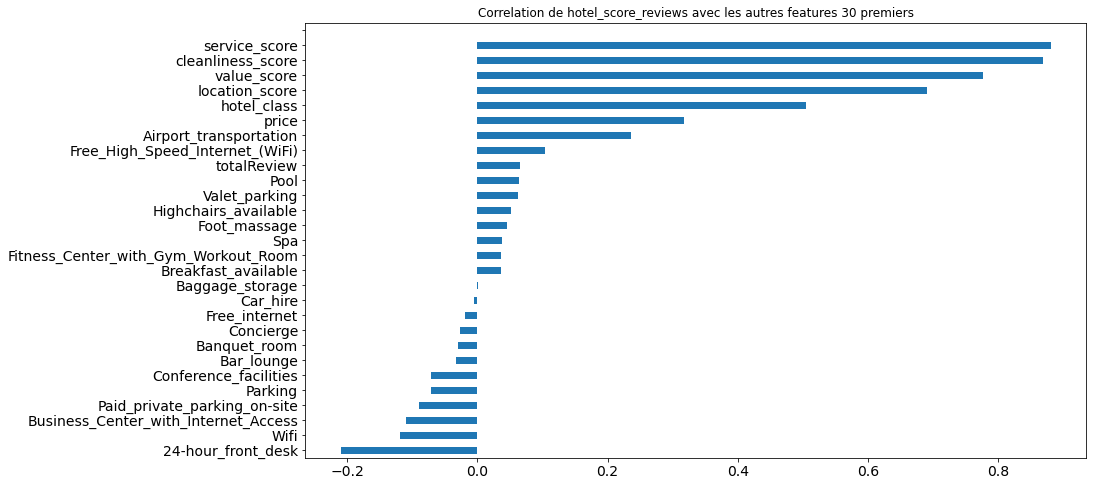

In [245]:
score_cor_data = hotels.corr()['hotel_score_reviews'][:30]
title = "Correlation de hotel_score_reviews avec les autres features 30 premiers"
score_cor_data[score_cor_data.index != 'hotel_score_reviews'].sort_values().plot(kind="barh", title=title, figsize=(14,8), fontsize=14)
plt.show()



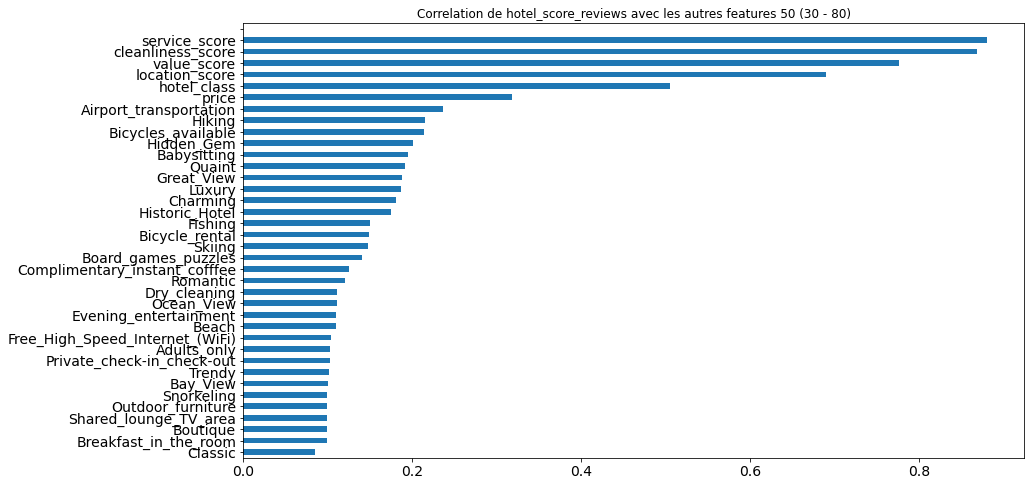

In [246]:
score_cor_data = hotels.corr()['hotel_score_reviews']
title = "Correlation de hotel_score_reviews avec les autres features "
score_cor_data[score_cor_data.index != 'hotel_score_reviews'].sort_values()[115:].plot(kind="barh", title=title, figsize=(14,8), fontsize=14)
plt.show()



In [255]:
hotels[(hotels.hotel_class != 1.0) & (hotels.hotel_class != 1.5)].groupby('hotel_class')['hotel_score_reviews'].describe()

,count,mean,std,min,25%,50%,75%,max
hotel_class,,,,,,,,
2.0,40.0,3.637500,0.669744,2.5,3.000,3.50,4.000,5.0
2.5,2.0,3.250000,1.060660,2.5,2.875,3.25,3.625,4.0
3.0,85.0,3.952941,0.460483,2.5,3.500,4.00,4.000,5.0
3.5,3.0,4.000000,0.866025,3.0,3.750,4.50,4.500,4.5
4.0,112.0,4.147321,0.406248,3.0,4.000,4.00,4.500,5.0
4.5,4.0,4.625000,0.478714,4.0,4.375,4.75,5.000,5.0
5.0,42.0,4.619048,0.266173,4.0,4.500,4.50,5.000,5.0


In [259]:
hotels[(hotels.hotel_class != 1.0) & (hotels.hotel_class != 1.5)].groupby('hotel_class')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
hotel_class,,,,,,,,
2.0,40.0,1255.487500,451.315122,562.0,931.375,1166.50,1462.500,2367.0
2.5,2.0,1434.750000,354.614051,1184.0,1309.375,1434.75,1560.125,1685.5
3.0,85.0,1790.570588,1101.251075,390.0,1184.500,1614.50,2182.500,9034.0
3.5,3.0,1629.833333,633.612921,1208.5,1265.500,1322.50,1840.500,2358.5
4.0,112.0,2402.593750,1930.167820,800.5,1409.500,1961.25,2546.375,13802.0
4.5,4.0,2326.000000,1750.183847,1211.5,1478.875,1577.00,2424.125,4938.5
5.0,42.0,3371.797619,2320.645805,1133.5,1678.125,2339.75,5004.625,9546.5


In [260]:
hotels.shape

(290, 162)

In [271]:
score_cor_data = hotels.corr()['hotel_class'].sort_values()[120:]
score_cor_data

Ironing_service                         0.091786
Trendy                                  0.092918
Car_hire                                0.094459
Pool                                    0.094582
Nightclub_DJ                            0.100681
Park_View                               0.108468
Bay_View                                0.108468
Beach                                   0.121478
Ocean_View                              0.122771
Conference_facilities                   0.122870
Board_games_puzzles                     0.124802
Taxi_service                            0.127134
Hiking                                  0.136378
Historic_Hotel                          0.147607
Romantic                                0.148922
Skiing                                  0.149800
Hidden_Gem                              0.174785
Evening_entertainment                   0.193439
Quaint                                  0.193859
Fitness_Center_with_Gym_Workout_Room    0.199342
Great_View          

# Working on Data

In [0]:
# Useless cell for now until we want to work on qualitative features
def get_qual_matrix(dataframe):
    cv = CountVectorizer()
    hotels_desc = []
    for index, row in dataframe.iterrows():
      desc = str(row['property_amenties'])+' '+str(row['room_features'])+' ' +str(row['hotel_style'])
      hotels_desc.append(desc)
    cv = CountVectorizer()
    temp = cv.fit_transform(Hotels_desc)
    sparse_matrix = list(map(lambda row:row.tolist(),features_matrix.toarray()))
    return(sparse_matrix)

def getFeatures(dataframe):
  quantit_features = list()
  hotel_faetures_matrix = get_qual_matrix(dataframe)
  for index,row in dataframe.iterrows():
    quantit_features = [row['hotel_score_reviews'],row['price'],row['hotel_class']]
    hotel_faetures_matrix[index] = hotel_faetures_matrix[index] + quantit_features
  return hotel_faetures_matrix


In [0]:
##cleaninig 
#def clean_dataset(df):
#    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#    df.dropna(inplace=True)
#    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#    return df[indices_to_keep].astype(np.float64)
#
##measure of similarity and sorting
#clean_dataset(hotels)
#prep = hotels.values.tolist()
#print(prep)
#similarity_scores = cosine_similarity(prep)
##similarity_scores = list((row.tolist(),x) for (x, row) in enumerate(similarity_scores))
#print(similarity_scores)

In [0]:
import pandas as pd
from sklearn import preprocessing
hotels_quali = hotels.iloc[:,10:18]
x = hotels_quali.values #returns a numpy array
print(hotels_quali.head())
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
hotels = pd.DataFrame(x_scaled)

In [0]:
hotel_similarity_df = hotels.transpose().corr().round(2)
hotel_similarity_df